# T2.4 Regressió logística

# Índex

1. Codificació one-hot i distribució categòrica
2. Model probabilístic de classificació amb softmax
3. Regressió logística
4. Aprenentatge per màxima versemblança
5. Algorisme d'aprenentatge amb descens per gradient

# 1 Codificació one-hot i distribució categòrica

**Variable categòrica:** $\;$ variable aleatòria que pren un valor d'un conjunt finit de categories (no ordenades)

**Exemples de variables categòriques:** $\;$ color RGB, **etiqueta de classe,** paraula d'un vocabulari, etc.

**Codificació one-hot:** $\;$ d'una variable categòrica $y$ que pren un valor entre $C$ possibles, $\,\{1,\dotsc,C\}$
$$\operatorname{one-hot}(y)%
=\boldsymbol{y}%
=\begin{pmatrix}y_1\\\vdots\\y_C\end{pmatrix}%
=\begin{pmatrix}\mathbb{I}(y=1)\\\vdots\\\mathbb{I}(y=C)\end{pmatrix}\in\{0,1\}^C%
\quad\text{amb}\quad%
\sum_c y_c=1$$

**Distribució categòrica:** $\;$ distribució de probabilitats entre les $C$ possibles categories d'una variable categòrica, les probabilitats de les quals venen donades per un vector paràmetres $\,\boldsymbol{\theta}\in[0,1]^C\,$ tal que $\,\sum_c\theta_c=1$
$$\operatorname{Cat}(y\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{\mathbb{I}(y=c)}%
\qquad\text{o, en notació one-hot,}\qquad%
\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\theta})=\prod_{c=1}^C\theta_c^{y_c}$$

**Convenció:** $\;0^0=1\;$ i $\;0\log 0=0;\;$ per exemple, amb $\,\boldsymbol{\theta}=(0.5, 0.5, 0)^t,\,\operatorname{Cat}(\boldsymbol{y}=(1,0,0)^t\mid\boldsymbol{\theta})=0.5^10.5^00^0=0.5$

# 2 Model probabilístic de classificació amb softmax

**Normalització probabilística de classificadors:** $\;$ tot classificador definit amb funcions discriminants generals pot representar-se mitjançant un classificador equivalent amb funcions discriminants normalitzades probabilísticament
$$\begin{align*}
c(\boldsymbol{x})%
&=\operatorname*{argmax}\limits_c\;a_c && \text{on $\,a_c\,$ és la discriminant de la classe $c$ avaluada a $\boldsymbol{x}$}\\%
&=\operatorname*{argmax}\limits_c\;e^{a_c} && \text{amb}\;h(z)=e^z\in\mathbb{R}^{\geq 0}\;\text{estrictament creixent}\\%
&=\operatorname*{argmax}\limits_c\;\frac{e^{a_c}}{\sum_{c'} e^{a_{c'}}} && \text{amb}\;h(z)=kz,\,k\;\text{constant positiva (invariable amb $c$)}%
\end{align*}$$

**La funció softmax:** $\;$ transforma un vector de **logits** (log-probabilitats no normalitzades) $\,\boldsymbol{a}\in\mathbb{R}^C\,$ en un de probabilitats $[0,1]^C$
$$\mathcal{S}(\boldsymbol{a})=\left[%
\frac{e^{a_1}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}},\dotsc,%
\frac{e^{a_C}}{\sum_{\tilde{c}}e^{a_{\tilde{c}}}}\right]%
\qquad\text{complint-se}\qquad%
0\leq\mathcal{S}(\boldsymbol{a})_c\leq 1%
\quad\text{i}\quad%
\sum_c \mathcal{S}(\boldsymbol{a})_c=1$$

**Model probabilístic de classificació amb softmax:** $\;$ en comptes de predir una única classe més probable, predim les probabilitats de totes les classes a partir d'una funció predictora de logits, $\,f:\mathcal{X}\to\mathbb{R}^C,\,$ governada per un vector de paràmetres $\,\boldsymbol{\theta}$
$$p(\boldsymbol{y}\mid\boldsymbol{x},\boldsymbol{\theta})%
=\operatorname{Cat}(\boldsymbol{y}\mid\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta})))%
=\prod_c(\mathcal{S}(f(\boldsymbol{x};\boldsymbol{\theta}))_c)^{y_c}$$

**Conveniència del model en inferència:** $\;$ la predicció de les probabilitats de totes les classes permet aplicar regles més generals que la MAP, per exemple en cas d'errors amb costs diferents; a més, si volem aplicar la regla MAP, no cal softmax-normalitzar logits

**Conveniència del model en aprenentatge:** $\;$ permet plantejar l'aprenentatge probabilísticament, amb criteris estàndard com ara màxima versemblança; a més, gràcies a la softmax, $\,f(\boldsymbol{x};\boldsymbol{\theta})\,$
pot triar-se lliurement ja que no està subjecta a les restriccions de probabilitat

# 3 Regressió logística

**Regressió logística:** $\;$ model amb softmax i **logits lineals** amb l'entrada (en notació homogènia)
$$p(\boldsymbol{y}\mid\boldsymbol{x},\mathbf{W})%
=\operatorname{Cat}(\boldsymbol{y}\mid\boldsymbol{\mu})%
\quad\text{amb}\quad%
\boldsymbol{\mu}=\mathcal{S}(\boldsymbol{a}),\quad%
\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x},\quad%
\mathbf{W}\in\mathbb{R}^{D\times C}\quad\text{i}\quad\boldsymbol{x}\in\mathbb{R}^D$$

**Diferència amb els classificadors basats en discriminants lineals:** $\;$ cap, llevat que regressió logística prediu les probabilitats de totes les classes

**Exemple (cont. de Perceptró):** $\quad C=D=2,\quad a_1=g_1(x_1,x_2)=-x_1-x_2+1,\quad a_2=g_2(x_1,x_2)=x_1+x_2-1$
$$\boldsymbol{a}=f(\boldsymbol{x};\mathbf{W})=\mathbf{W}^t\boldsymbol{x}%
\quad\text{amb}\quad%
\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\quad\text{i}\quad%
\boldsymbol{x}=\begin{pmatrix}1\\x_1\\x_2\end{pmatrix}$$

<center>

|$\boldsymbol{x}^t$|$\boldsymbol{a}^t$|$\mu_1=\mathcal{S}(\boldsymbol{a})_1$|$\mu_2=\mathcal{S}(\boldsymbol{a})_2$|
|:-:|:-:|:-:|:-:|
|$(1,0,0)$|$(1,-1)$|$\frac{e^1}{e^1+e^{-1}}=0.8808$|$\frac{e^{-1}}{e^1+e^{-1}}=0.1192$|
|$(1,1,1)$|$(-2,1)$|$\frac{e^{-2}}{e^{-2}+e^1}=0.0474$|$\frac{e^1}{e^{-2}+e^1}=0.9526$|
|$(1,0.5,0.5)$|$(0,0)$|$\frac{e^0}{e^0+e^0}=0.5000$|$\frac{e^0}{e^0+e^0}=0.5000$|

</center>

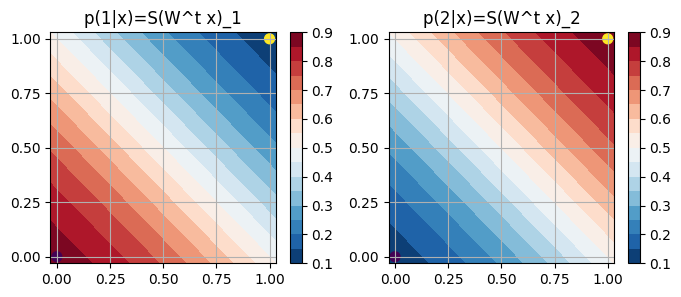

In [1]:
import numpy as np; import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 1]]).astype(float); y = np.array([1, 2]).astype(int)
x1, x2 = np.meshgrid(np.linspace(-.03, 1.03, 50), np.linspace(-.03, 1.03, 50))
XX = np.c_[np.ravel(x1), np.ravel(x2)]
Wt = np.array([[1, -1, -1], [-1, 1, 1]]).astype(float)
P = lambda x: (np.exp(Wt[0, 0] + Wt[0, 1:] @ x), np.exp(Wt[1, 0] + Wt[1, 1:] @ x))
PP = np.apply_along_axis(P, 1, XX); PP = PP/PP.sum(axis=1, keepdims=True)
_, axs = plt.subplots(1, 2, figsize=(8, 3))
for i, ax in enumerate(axs.flat):
    ax.set_xticks(np.linspace(0., 1, 5)); ax.set_yticks(np.linspace(0., 1, 5));
    ax.grid(); ax.set_title(f'p({i+1}|x)=S(W^t x)_{i+1}')
    cp = ax.contourf(x1, x2, PP[:, i].reshape(x1.shape), 15, cmap='RdBu_r')
    plt.colorbar(cp, ax=ax); ax.scatter(*X.T, c=y, s=50);

# 4 Aprenentatge per màxima versemblança

**Propòsit:** $\;$ establir un criteri per a aprendre $\,\mathbf{W}\,$ a partir d'un conjunt de dades d'entrenament, $\,\mathcal{D}=\{(\boldsymbol{x}_n,\boldsymbol{y}_n)\}_{n=1}^N$

## Aprenentatge per màxima versemblança

**Log-versemblança (condicional):** $\;$ log-probabilitat de $\,\mathcal{D}\,$ interpretada com a funció de $\,\mathbf{W}$
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=\log p(\mathcal{D}\mid\mathbf{W})=\log \prod_{n=1}^N p(\boldsymbol{y}_n\mid\boldsymbol{x}_n,\mathbf{W})\\%
&=\sum_{n=1}^N \log \operatorname{Cat}(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
\qquad\text{amb}\quad\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)\quad\text{i}\quad\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n\\%
&=\sum_{n=1}^N \log\prod_{c=1}^C \mu_{nc}^{y_{nc}}=\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}%
\end{align*}$$

**Exemple (cont.):** $\;$ log-versemblança de $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}\;$ amb $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^t,(0,1)^t)\}$
$$\begin{align*}
\operatorname{LL}(\mathbf{W})%
&=y_{11}\log\mu_{11}+y_{12}\log\mu_{12}+y_{21}\log\mu_{21}+y_{22}\log\mu_{22}\\%
&=\log\mu_{11}+\log\mu_{22}\\
&=\log 0.8808+\log 0.9526=-0.1269-0.0486=-0.1755
\end{align*}$$

**Aprenentatge per màxima versemblança:** $\;$ triem un $\,\mathbf{W}\,$ que atorgue màxima probabilitat a $\,\mathcal{D}$
$$\mathbf{W}^*=\operatorname*{argmax}_{\mathbf{W}}\;\operatorname{LL}(\mathbf{W})$$

## Plantejament com un problema de minimització

**Neg-log-versemblança:** $\;$ log-versemblança amb el signe canviat i normalitzada pel nombre de dades
$$\operatorname{NLL}(\mathbf{W})%
=-\frac{1}{N}\operatorname{LL}(\mathbf{W})%
=-\frac{1}{N}\sum_{n=1}^N\sum_{c=1}^C y_{nc}\log\mu_{nc}%
\qquad\text{amb}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{i}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Exemple (cont.):** $\;$ neg-log-versemblança de $\;\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}\;$ amb $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^t,(0,1)^t)\}$
$$\operatorname{NLL}(\mathbf{W})=-\frac{1}{2}\operatorname{LL}(\mathbf{W})=0.0878$$

**Risc empíric amb log-pèrdua:** $\;$ és el mateix que la NLL
$$\mathcal{L}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=\operatorname{NLL}(\mathbf{W})%
\quad\text{amb}\quad%
\ell(\boldsymbol{y}_n,\hat{\boldsymbol{y}}_n)%
=-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)%
=-\sum_{c=1}^C y_{nc}\log\mu_{nc}$$
* Si el model assigna probabilitat ú a la classe correcta, la pèrdua és nul·la;
* Si no, la pèrdua serà positiva i serà més gran quan menor siga la probabilitat assignada a la classe correcta

**Aprenentatge per mínima NLL:** $\;$ aprenentatge per màxima versemblança plantejat com un problema de minimització
$$\mathbf{W}^*=\operatorname*{argmin}_{\mathbf{W}}\;\operatorname{NLL}(\mathbf{W})$$

**Exemple (cont.):** $\;\mathcal{D}=\{((1,0,0)^t,(1,0)^t),((1,1,1)^t,(0,1)^t)\};\;$ per simplicitat, suposem que hem de triar per mínima NLL entre
$$\mathbf{W}^t=\begin{pmatrix}1&-1&-1\\-1&1&1\end{pmatrix}%
\qquad\text{i}\qquad%
\tilde{\mathbf{W}}^t=\begin{pmatrix}-1&1&1\\1&-1&-1\end{pmatrix}$$
Triem $\mathbf{W}$ ja que la seua NLL, $0.0878$ (calculada abans), és menor que la de $\,\tilde{\mathbf{W}}:$
$$\operatorname{NLL}(\tilde{\mathbf{W}})%
=-\frac{1}{2}(\log\tilde{\mu}_{11}+\log\tilde{\mu}_{22})%
=-\log\frac{e^{-1}}{e^{-1}+e^1}=\log(1+e^2)=2.1269$$

# 5 Algorisme d'aprenentatge amb descens per gradient

**Propòsit:** $\;$ a diferència del risc amb pèrdua 01 (taxa d'error en entrenament), el risc amb log-pèrdua (NLL) és derivable, per la qual cosa podem minimitzar-lo amb tècniques d'optimització estàndard com ara descens per gradient

## Descens per gradient

**Descens per gradient:** $\;$ algorisme iteratiu per a minimitzar un objectiu $\,\mathcal{L}(\boldsymbol{\theta})\,$ a partir d'un $\,\boldsymbol{\theta}_0\,$ donat
$$\boldsymbol{\theta}_{i+1}=\boldsymbol{\theta}_i-\eta_i\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_i}\qquad i=0,1,\ldots$$

**Factor d'aprenentatge:** $\;\eta_i>0\,$ juga el mateix paper que en Perceptró; podem triar un valor constant menut, $\,\eta_i=\eta$

**Dirección de descens més pronunciada:** $\;-\boldsymbol{\nabla}\mathcal{L}(\boldsymbol{\theta})\rvert_{\boldsymbol{\theta}_i}\,$ és el neg-gradient de l'objectiu avaluat a $\boldsymbol{\theta}_i$

**Convergència:** $\;$ si $\,\eta\,$ no és molt gran i l'objectiu és convex (amb forma de bol), convergeix a un mínim (global)

**Exemple:** $\;\mathcal{L}(\theta)=\theta^2,\,$ $\theta_0=10,\,$ $\eta_t=0.2,\,$ $\frac{d\mathcal{L}}{d\theta}=2\theta\,$ i tolerància $0.01$

In [2]:
import numpy as np
grad, theta, eta, tol, delta = lambda t: 2*t, 10.0, 0.2, 0.01, np.inf
while np.abs(delta) > tol:
	delta = -eta * grad(theta)
	theta += delta
	print(np.round(delta, 4), np.round(theta, 4))

-4.0 6.0
-2.4 3.6
-1.44 2.16
-0.864 1.296
-0.5184 0.7776
-0.311 0.4666
-0.1866 0.2799
-0.112 0.168
-0.0672 0.1008
-0.0403 0.0605
-0.0242 0.0363
-0.0145 0.0218
-0.0087 0.0131


## Descens per gradient aplicat a regressió logística

**NLL:** $\;$ la NLL és una funció objectiu convexa
$$\operatorname{NLL}(\mathbf{W})%
=\frac{1}{N}\sum_{n=1}^N-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n)
\qquad\text{amb}\quad%
\boldsymbol{\mu}_n=\mathcal{S}(\boldsymbol{a}_n)%
\quad\text{i}\quad%
\boldsymbol{a}_n=\mathbf{W}^t\boldsymbol{x}_n$$

**Gradient de la NLL:** $\;$ només farem ús del resultat
$$\frac{\partial\operatorname{NLL}}{\partial\mathbf{W}^t}%
=\frac{1}{N}\sum_{n=1}^N\frac{\partial(-\log p(\boldsymbol{y}_n\mid\boldsymbol{\mu}_n))}{\partial\mathbf{W}^t}%
=\frac{1}{N}\sum_{n=1}^N\boldsymbol{x}_n(\boldsymbol{\mu}_n-\boldsymbol{y}_n)^t$$